![Data Loading](../Data/images/chase-top-banner3.png)


*Author: Ajay Varma*  
*Date: 2025-MAR-29*  
*Project Directory: `/Users/ajayvarma/Documents/VS Code/Workspace/Data Science/Projects/Chase/`*  
*Type: Portfolio Project*

## <span style="color:#1979d5">Customer Churn Prediction</span>

---

### Project Overview

#### Objective
The aim of this project is to develop a machine learning model capable of predicting customer churn for a bank. By identifying customers who are likely to leave, the bank can take proactive measures to retain them, improve customer satisfaction, and reduce revenue loss.

#### Dataset
The dataset contains customer information such as:
- **Demographics**: Age, gender, geography
- **Account Information**: Balance, credit score
- **Product Usage**: Number of products, credit card ownership
- **Engagement Metrics**: Activity status

The target variable, **Exited**, indicates whether the customer churned (1) or remained with the bank (0).

#### Methodology

1. **Data Preprocessing**:  
   The dataset was cleaned by removing irrelevant columns, handling missing values, and eliminating duplicates. 

2. **Feature Engineering**:  
   Categorical variables like **Geography** and **Gender** were encoded using **One-Hot Encoding** and **Binary Encoding**, respectively.

3. **Class Imbalance Handling**:  
   Oversampling was applied to the minority class (churned customers) to balance the dataset and prevent the model from being biased towards the majority class.

4. **Model Development**:  
   Multiple classification algorithms, including **Logistic Regression**, **Random Forest**, **Decision Tree**, and **XGBoost**, were implemented and compared to identify the best performer.

5. **Feature Scaling**:  
   **Standardization** was applied to ensure that all features contributed equally to the model’s predictions.

6. **Model Evaluation**:  
   Models were evaluated using metrics such as **accuracy**, **precision**, **recall**, **F1-score**, and **confusion matrices** to assess performance from different perspectives.

---

### Key Performance Metrics

- **Accuracy**: Measures how well the model predicts both churned and non-churned customers.
- **Precision**: The proportion of correctly predicted churned customers among all predicted churned customers.
- **Recall**: The ability of the model to identify actual churned customers.
- **F1-Score**: The harmonic mean of precision and recall, providing a balanced measure of model performance.

---

### Tools and Libraries Used:
- **Python Libraries**: pandas, numpy, matplotlib, seaborn, scikit-learn, xgboost
- **Data Science Techniques**: Data preprocessing, feature engineering, class imbalance handling, model training and evaluation, feature importance analysis, cross-validation


![Data Loading](../Data/images/chase-step1.png)




In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

![Data Loading](../Data/images/chase-step2.png)



In [65]:
df=pd.read_csv('/Users/ajayvarma/Documents/VS Code/Workspace/Data Science/Projects/Chase/Data/Chase-churn-modelling.csv')

In [66]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [67]:
# Check the shape of the dataset
print('Dataset size:', df.shape)

Dataset size: (10002, 14)


![Data Loading](../Data/images/chase-step3.png)




In [68]:
# Data Cleaning

# Drop irrelevant columns: RowNumber, CustomerId, Surname
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
print(df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [69]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values Before Filling:\n", missing_values)

Missing Values Before Filling:
 CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


In [70]:
# Check for duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]

In [71]:
# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

In [72]:
# Display the duplicate rows and the count
duplicate_rows

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10001,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [73]:
# Display the duplicate rows and the count
num_duplicates

2

In [74]:
# Remove duplicate rows
df = df.drop_duplicates()

In [75]:
# Recheck the dataset for any remaining duplicate rows
remaining_duplicates = df[df.duplicated()]
num_remaining_duplicates = remaining_duplicates.shape[0]

In [76]:
# Display the count of remaining duplicates
num_remaining_duplicates

0

In [77]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


![Data Loading](../Data/images/chase-step4.png)




In [78]:
missing_values = df.isnull().sum()
print(missing_values)

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


In [79]:
# Fill missing values for 'HasCrCard' and 'IsActiveMember' using forward fill
df['HasCrCard'] = df['HasCrCard'].fillna(method='ffill')
df['IsActiveMember'] = df['IsActiveMember'].fillna(method='ffill')

In [80]:
# Fill missing value in 'Geography' with the mode (most frequent value)
geography_mode = df['Geography'].mode()[0]
df['Geography'].fillna(geography_mode, inplace=True)

In [81]:
# Fill missing value in 'Age' with the median
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)

In [82]:
# Confirm that all missing values are filled
missing_values_final = df.isnull().sum()
print("Missing Values After Filling:\n", missing_values_final)

Missing Values After Filling:
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


![Data Loading](../Data/images/chase-step5.png)




In [83]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000
mean,650.528800,38.922903,5.012800,76485.889288,1.530200,0.705400,0.5150,100090.239881,0.203700
std,96.653299,10.487128,2.892174,62397.405202,0.581654,0.455886,0.4998,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.0000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.0000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.0000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.0000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.0000,199992.480000,1.000000


In [84]:
categorical_summary = df.describe(include='object')

In [85]:
categorical_summary

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


![Data Loading](../Data/images/chase-step6.png)




In [86]:
# One-Hot Encoding for 'Geography'
df_encoded = pd.get_dummies(df, columns=['Geography'])

In [87]:
# Binary Encoding for 'Gender'
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})

In [88]:
# Display the encoded dataframe
print("Encoded DataFrame Head:\n", df_encoded.head())

Encoded DataFrame Head:
    CreditScore  Gender   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       1  42.0       2       0.00              1        1.0   
1          608       1  41.0       1   83807.86              1        0.0   
2          502       1  42.0       8  159660.80              3        1.0   
3          699       1  39.0       1       0.00              2        0.0   
4          850       1  43.0       2  125510.82              1        0.0   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0             1.0        101348.88       1              True   
1             1.0        112542.58       0             False   
2             0.0        113931.57       1              True   
3             0.0         93826.63       0              True   
4             1.0         79084.10       0             False   

   Geography_Germany  Geography_Spain  
0              False            False  
1              False             True  
2      

![Data Loading](../Data/images/chase-step7.png)




In [89]:
# Check the original class distribution
original_class_distribution = df_encoded['Exited'].value_counts()
print("\nOriginal Class Distribution:\n", original_class_distribution)


Original Class Distribution:
 Exited
0    7963
1    2037
Name: count, dtype: int64


In [90]:
# Separate the majority and minority classes
majority_class = df_encoded[df_encoded['Exited'] == 0]
minority_class = df_encoded[df_encoded['Exited'] == 1]

In [91]:
# Oversample the minority class
minority_oversampled = resample(minority_class,
                                replace=True, 
                                n_samples=len(majority_class),  
                                random_state=42)

In [92]:
# Combine the majority class with the oversampled minority class
data_balanced = pd.concat([majority_class, minority_oversampled])

In [93]:
# Check the new class distribution after oversampling
df_balanced_distribution = data_balanced['Exited'].value_counts()
print("\nNew Class Distribution After Oversampling:\n", df_balanced_distribution)


New Class Distribution After Oversampling:
 Exited
0    7963
1    7963
Name: count, dtype: int64


![Data Loading](../Data/images/chase-step8.png)




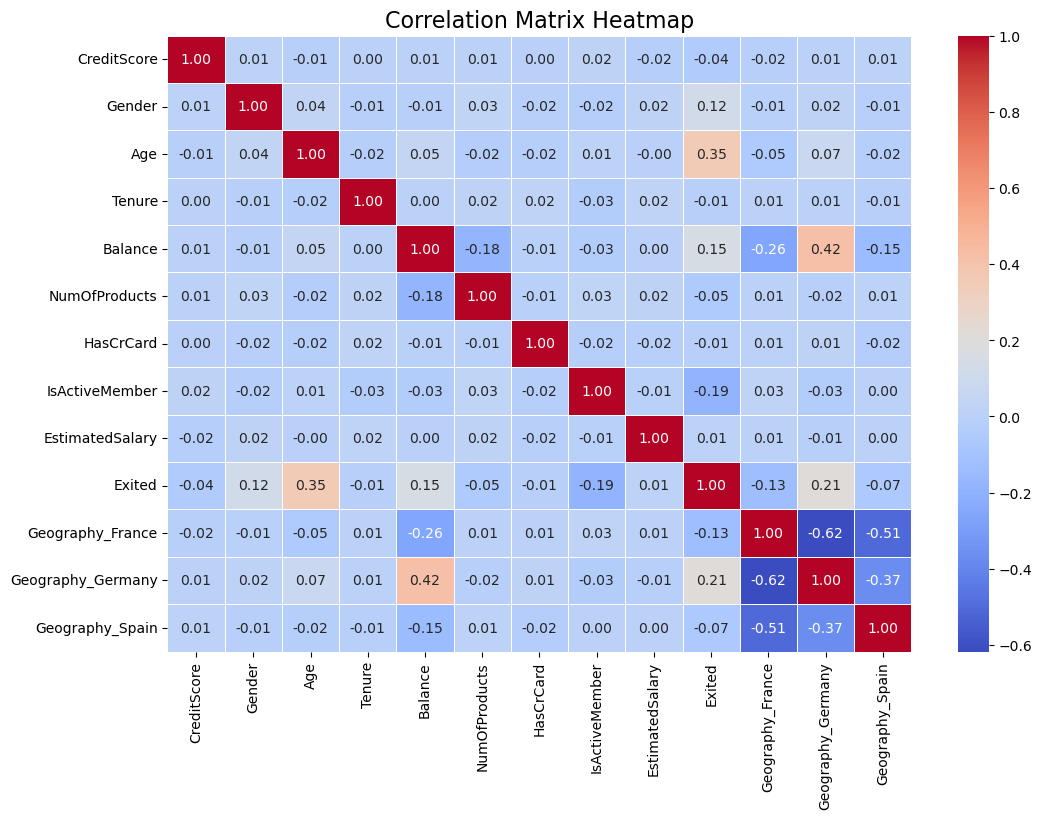

In [94]:
# Calculate the correlation matrix
correlation_matrix = data_balanced.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


![Data Loading](../Data/images/chase-step9.png)




In [95]:
# Define features (X) and target (y)
X = data_balanced.drop('Exited', axis=1)
y = data_balanced['Exited']


In [96]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [97]:
# Display the shape of the training and testing sets
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Testing Set: {X_test.shape}, {y_test.shape}")

Training Set: (12740, 12), (12740,)
Testing Set: (3186, 12), (3186,)


![Data Loading](../Data/images/chase-step10.png)




In [98]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

![Data Loading](../Data/images/chase-step11.png)




In [99]:
# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [100]:
# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test_scaled)


![Data Loading](../Data/images/chase-step12.png)




In [101]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_log_reg)
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
class_report = classification_report(y_test, y_pred_log_reg)

# Display the results
print("Logistic Regression - Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Logistic Regression - Evaluation Metrics:
Accuracy: 0.6968
Precision: 0.7032
Recall: 0.6811
F1 Score: 0.6920
Confusion Matrix:
[[1135  458]
 [ 508 1085]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1593
           1       0.70      0.68      0.69      1593

    accuracy                           0.70      3186
   macro avg       0.70      0.70      0.70      3186
weighted avg       0.70      0.70      0.70      3186



In [102]:
# Compute the confusion matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)


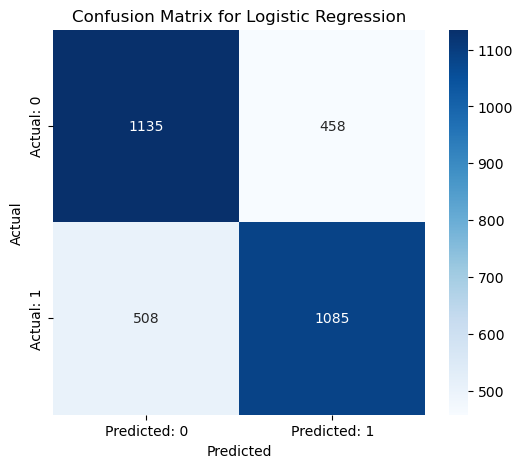

In [103]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Actual: 0', 'Actual: 1'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


![Data Loading](../Data/images/chase-step13.png)




In [104]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [105]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)


![Data Loading](../Data/images/chase-step14.png)




In [106]:
# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Display the results
print("Random Forest - Evaluation Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(class_report_rf)


Random Forest - Evaluation Metrics:
Accuracy: 0.9526
Precision: 0.9251
Recall: 0.9849
F1 Score: 0.9541
Confusion Matrix:
[[1466  127]
 [  24 1569]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1593
           1       0.93      0.98      0.95      1593

    accuracy                           0.95      3186
   macro avg       0.95      0.95      0.95      3186
weighted avg       0.95      0.95      0.95      3186



In [107]:
# Compute the confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)


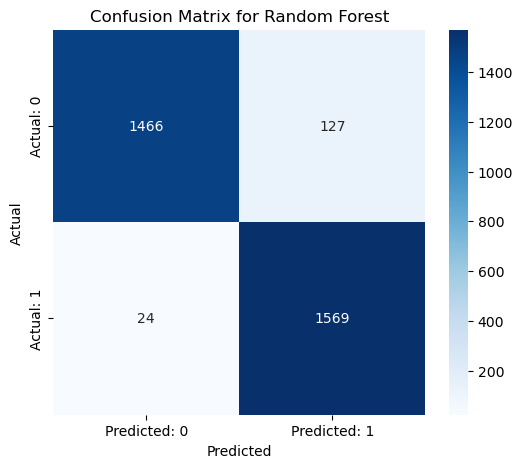

In [108]:
# Plotting the confusion matrix for Random Forest as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Actual: 0', 'Actual: 1'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


![Data Loading](../Data/images/chase-step15.png)




In [109]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

In [110]:
# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_scaled)

![Data Loading](../Data/images/chase-step16.png)




In [111]:
# Calculate evaluation metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Display the results for Decision Tree
print("Decision Tree - Evaluation Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print("Confusion Matrix:")
print(conf_matrix_dt)
print("Classification Report:")
print(class_report_dt)


Decision Tree - Evaluation Metrics:
Accuracy: 0.9156
Precision: 0.8653
Recall: 0.9843
F1 Score: 0.9210
Confusion Matrix:
[[1349  244]
 [  25 1568]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1593
           1       0.87      0.98      0.92      1593

    accuracy                           0.92      3186
   macro avg       0.92      0.92      0.92      3186
weighted avg       0.92      0.92      0.92      3186



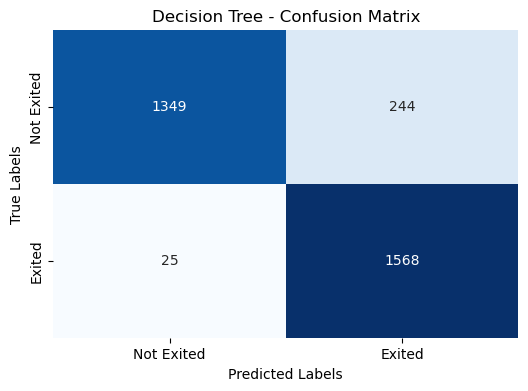

In [112]:
# Generate confusion matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


![Data Loading](../Data/images/chase-step17.png)




In [113]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)


![Data Loading](../Data/images/chase-step18.png)




In [114]:
# Calculate evaluation metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

# Display the results for XGBoost
print("XGBoost - Evaluation Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print("Confusion Matrix:")
print(conf_matrix_xgb)
print("Classification Report:")
print(class_report_xgb)


XGBoost - Evaluation Metrics:
Accuracy: 0.9036
Precision: 0.8743
Recall: 0.9429
F1 Score: 0.9073
Confusion Matrix:
[[1377  216]
 [  91 1502]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1593
           1       0.87      0.94      0.91      1593

    accuracy                           0.90      3186
   macro avg       0.91      0.90      0.90      3186
weighted avg       0.91      0.90      0.90      3186



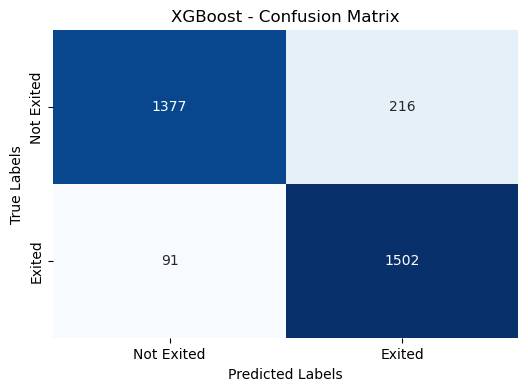

In [115]:
# Plotting the confusion matrix as a heatmap for XGBoost
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])

# Adding titles and labels
plt.title("XGBoost - Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Display the plot
plt.show()

![Data Loading](../Data/images/chase-step19.png)




In [116]:
# Logistic Regression Metrics
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Random Forest Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Decision Tree Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# XGBoost Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)


In [117]:
# Collecting metrics for all models
model_metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost'],
    'Accuracy': [accuracy_log_reg, accuracy_rf, accuracy_dt, accuracy_xgb],
    'Precision': [precision_log_reg, precision_rf, precision_dt, precision_xgb],
    'Recall': [recall_log_reg, recall_rf, recall_dt, recall_xgb],
    'F1 Score': [f1_log_reg, f1_rf, f1_dt, f1_xgb]
}

In [118]:
# Create a DataFrame to show the metrics
metrics_df = pd.DataFrame(model_metrics)

In [119]:
# Display the table
print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.696798   0.703176  0.681105  0.691964
1        Random Forest  0.952605   0.925118  0.984934  0.954089
2        Decision Tree  0.915568   0.865342  0.984306  0.920999
3              XGBoost  0.903641   0.874272  0.942875  0.907279


![Data Loading](../Data/images/chase-step20.png)




In [120]:
import joblib

# Define the full path where the model will be saved
model_path = '/Users/ajayvarma/Documents/VS Code/Workspace/Data Science/Projects/Chase/Models/churn_random_forest_model.pkl'

# Save the Random Forest model
joblib.dump(rf_model, model_path)

print("Model saved successfully at:", model_path)


Model saved successfully at: /Users/ajayvarma/Documents/VS Code/Workspace/Data Science/Projects/Chase/Models/churn_random_forest_model.pkl


![Data Loading](../Data/images/chase-step21.png)




In [121]:
# Get feature importance from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importance_df)


Feature Importance:
              Feature  Importance
2                 Age    0.254742
4             Balance    0.144140
8     EstimatedSalary    0.138323
0         CreditScore    0.134328
5       NumOfProducts    0.126459
3              Tenure    0.080745
7      IsActiveMember    0.036658
10  Geography_Germany    0.025545
1              Gender    0.019779
6           HasCrCard    0.018037
9    Geography_France    0.011699
11    Geography_Spain    0.009546


![Data Loading](../Data/images/chase-step22.png)




In [122]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform cross-validation (10 folds by default)
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=10, scoring='accuracy')

# Display the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(cv_scores):.4f}")


Cross-validation scores: [0.94583987 0.93485086 0.94897959 0.95368917 0.94583987 0.9466248
 0.9411303  0.94976452 0.95054945 0.95133438]
Mean cross-validation accuracy: 0.9469
Standard deviation of cross-validation accuracy: 0.0052


In [123]:
# Assuming y_test is the actual target (Exited) and y_pred_rf is the predictions from the model
# Create a DataFrame that includes the features and the target and predictions
results = X_test.copy()  # Get the feature set for the test data
results['Actual Exited'] = y_test  # Add actual target
results['Predicted Exited'] = y_pred_rf  # Add model predictions

# Save the results to a CSV
results.to_csv('/Users/ajayvarma/Documents/VS Code/Workspace/Data Science/Projects/Chase/Results/random_forest_predictions.csv', index=False)

print("Results saved successfully!")


Results saved successfully!


![Data Loading](../Data/images/chase-step23.png)




In [124]:
# Path to your CSV file
file_path = '/Users/ajayvarma/Documents/VS Code/Workspace/Data Science/Projects/Chase/Results/random_forest_predictions.csv'

# Read the CSV file into a DataFrame
predictions_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
predictions_df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Actual Exited,Predicted Exited
0,657,1,37.0,6,95845.60,1,1.0,0.0,122218.23,True,False,False,0,0
1,726,1,51.0,8,107494.86,2,1.0,0.0,140937.91,False,True,False,1,1
2,505,0,40.0,6,47869.69,2,1.0,1.0,155061.97,False,True,False,0,0
3,666,0,39.0,10,0.00,2,1.0,0.0,102999.33,True,False,False,0,0
4,583,0,40.0,3,0.00,2,1.0,0.0,47728.00,True,False,False,0,0


![Data Loading](../Data/images/Recommendations.png)

---

### Results

- Among the models tested, **Random Forest** was the standout performer, with the highest **accuracy** (95.26%) and **recall** (98.49%).
- **Feature importance analysis** revealed that key predictors of churn include **Age**, **Balance**, and **Geography**.
- Cross-validation confirmed that **Random Forest** generalizes well across different subsets of the data, with a mean accuracy of **94.69%**.

---

### Next Steps / Recommendations to Improve Recall and Overall Model Performance:

1. **Random Forest as the Best Model**:
   - The **Random Forest** model exhibited exceptional performance with **accuracy of 95.26%**, **recall of 98.49%**, and **F1-score of 95.41%**. It is recommended to prioritize **Random Forest** for further fine-tuning and deployment.
   - **Cross-validation results** (mean accuracy of **94.69%**) demonstrate its stability and generalizability across different data subsets.

2. **Hyperparameter Tuning**:
   - To further improve the **Random Forest** model’s performance, hyperparameters like `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf` can be fine-tuned using **GridSearchCV** or **RandomizedSearchCV**.
   - Fine-tuning should focus on improving recall and **F1-score**.

3. **Feature Engineering Based on Feature Importance**:
   - **Age**, **Balance**, and **EstimatedSalary** emerged as the most influential features. Exploring transformations such as **non-linear scaling** or **binning** for these variables could enhance predictive power.
   - **Geography** and **Gender** had lower importance, but experimenting with interaction terms (e.g., combining **Geography** with **Age**) might reveal new insights.

4. **Addressing Class Imbalance**:
   - **Random Forest** has excellent recall, but to improve precision without sacrificing recall, techniques like **SMOTE (Synthetic Minority Over-sampling Technique)** or **SMOTETomek** (which combines SMOTE with Tomek links) can be applied.
   - **Undersampling** the majority class (non-churned customers) is another option, though it risks losing valuable information.

5. **Threshold Adjustment**:
   - Since recall is a priority, experimenting with lowering the decision threshold could increase recall at the expense of precision. This adjustment helps capture more churned customers, though it may increase false positives.

6. **Model Comparison and Ensemble Methods**:
   - **XGBoost** and **Decision Tree** models showed strong performance (recall values of 94.29% and 98.43%, respectively). Exploring **stacking** or **bagging** ensemble techniques could combine the strengths of these models, improving overall performance.

7. **Cross-Validation and Generalization**:
   - The **Random Forest** model has robust **cross-validation** results, indicating it generalizes well. To further ensure the model's performance across different data splits, increasing the number of cross-validation folds (e.g., from 10 to 20) could provide more granular insights.

8. **Model Deployment & Real-Time Monitoring**:
   - Given the model’s impressive performance, it is recommended to deploy **Random Forest** into production. An **automated monitoring system** should be set up to track key metrics such as **recall**, **precision**, and **F1-score** in real-time to detect model drift.
   - **Model retraining**: Periodic retraining using new data will be essential to ensure the model adapts to changing customer behaviors and maintains its predictive power over time.

---

### Conclusion

- **Random Forest** proved to be the most effective model for predicting customer churn, balancing **precision** and **recall**.
- **Recall optimization** ensures that churned customers are effectively captured, minimizing missed opportunities for retention efforts.
- By implementing **hyperparameter tuning**, **advanced feature engineering**, and **ensemble methods**, further improvements can be made to the model.
- Once optimized, the model can be deployed in production with real-time monitoring and retraining to maintain its efficacy in detecting customer churn.

---

This structure clearly separates the **top section** (overview, methodology, and tools) and **bottom section** (results, recommendations, and conclusion), making it both easy to read and informative for your project.


![Data Loading](../Data/images/chase-bottom-banner.png)
